# Predicting Peak Player Activity: Optimizing Game Server Resources

## Group Members: Sungjun Lee, Prima Cheung, Sayra Arij, Mishaa Murugathass

## Introduction

Predicting player activity patterns is crucial for optimizing server resource allocation, reducing latency, and improving overall gameplay satisfaction. Studies have shown that load prediction services can anticipate future game world entity distributions from historical data, enabling more efficient resource provisioning . Additionally, analyzing player behavior and gaming patterns allows for smarter allocation of resources, as metrics such as peak usage times and session lengths play a crucial role in this process.

This study aims to predict peak hours of player activity using historical session data from a video game research server. The dataset used in this project consists of two files: sessions.csv and players.csv. The focus of this report is on sessions.csv, which records play sessions from a video game research server. Key attributes include unique player identifiers, session start and end times, and Unix timestamp formats. However, potential issues such as missing end_time values, timestamp granularity, and data collection bias may affect analysis accuracy. The players.csv file provides additional information about the players themselves. It comprises 196 rows and 7 columns, including variables such as player experience, subscription status, total play hours, and demographic information.

The question we are asking is: **Can we predict the peak hours of player activity using historical session data?** Understanding peak play hours enables server administrators to allocate resources efficiently, ensuring smooth gameplay experiences without overloading or underutilizing server capacity. By leveraging historical session data, this study aims to develop a predictive model to inform decision-making in server management and resource distribution.



## Methods & Results

#### Load and Prepare Data

In [2]:
library(tidyverse)

sessions <- read_csv("https://raw.githubusercontent.com/anderpudding/dsci-project-005-16/refs/heads/main/data/sessions.csv")

Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


#### Wrangle and Tidy Data

In [3]:
sessions <- sessions |>
    mutate(start_time = strptime(start_time, "%d/%m/%Y %H:%M"),
        end_time = strptime(end_time, "%d/%m/%Y %H:%M"),
        session_duration = as.numeric(difftime(end_time, start_time, units = "mins")))

#### Summary Statistics

In [4]:
summary_stats <- sessions |>
    summarise(mean_session_duration = mean(session_duration, na.rm = TRUE),
        mean_players_per_hour = n() / length(unique(format(start_time, "%H"))))

summary_stats

mean_session_duration,mean_players_per_hour
<dbl>,<dbl>
50.85845,66.73913


#### Extract Time Features

In [5]:
sessions <- sessions |>
    mutate(hour = as.numeric(format(start_time, "%H")),
        day_of_week = weekdays(as.Date(start_time)))

#### Visualization 1: Player Activity by Hour

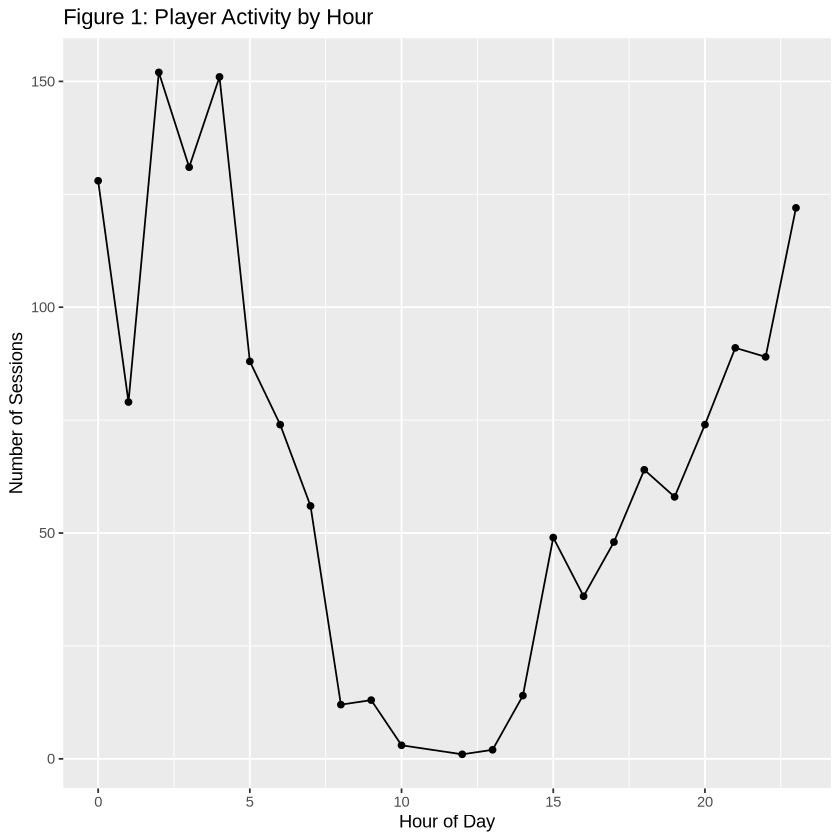

In [10]:
hourly_counts <- sessions |> 
    group_by(hour) |> 
    summarise(player_count = n())

ggplot(hourly_counts, aes(x = hour, y = player_count)) +
    geom_line() +
    geom_point() +
    labs(title = "Figure 1: Player Activity by Hour", x = "Hour of Day", y = "Number of Sessions")

#### Visualization 2: Player Activity by Day of Week

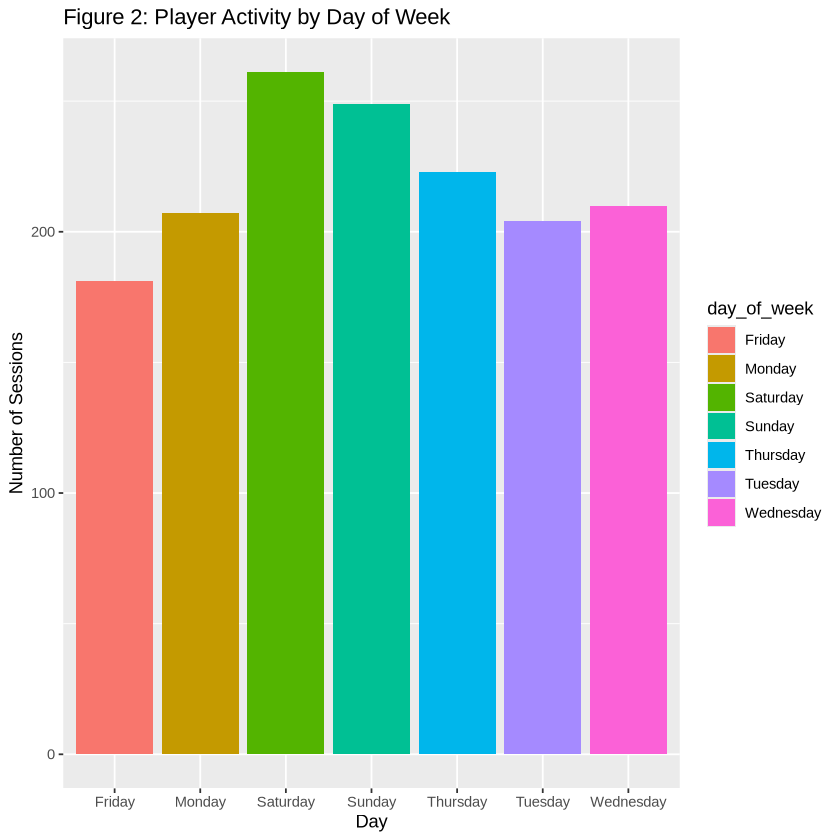

In [8]:
daily_counts <- sessions |> 
    group_by(day_of_week) |> 
    summarise(player_count = n())

ggplot(daily_counts, aes(x = day_of_week, y = player_count, fill = day_of_week)) +
    geom_bar(stat = "identity") +
    labs(title = "Figure 2: Player Activity by Day of Week", x = "Day", y = "Number of Sessions")